# **Import Library & Membaca Dataset**:

In [ ]:
import pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("dfTransjakarta180kRows.csv")
df.head(10)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,VRPJ892P3M98RA,3561407960318444,dki,"Dr. Janet Nashiruddin, M.Ak",M,2010,4,Pulo Gadung 2 - Tosari,1.0,P00167,...,106.89165,12.0,2023-04-03 06:53:02,P00127,Layur,-6.193539,106.89909,13.0,2023-04-03 07:13:28,3500.0
1,ZWCH834I6M26HS,347728053419394,emoney,Balamantri Rahayu,M,2002,JAK.28,Kp. Rambutan - Taman Wiladatika,1.0,B04633P,...,106.86298,27.0,2023-04-03 05:59:19,B00865P,Jln. Ar Ridho,-6.308148,106.86935,30.0,2023-04-03 06:57:06,0.0
2,YRLD835V6L82GO,377105453850671,emoney,Dian Mustofa,F,1993,B13,Bekasi Barat - Blok M,1.0,B02192P,...,106.99215,6.0,2023-04-03 05:13:24,B00108P,Bandar Djakarta Bekasi,-6.227085,106.99683,9.0,2023-04-03 06:01:23,20000.0
3,ZZBX143N6N83HQ,4486493302356581,dki,"Cut Janet Suryatmi, M.Ak",M,1980,8K,Batusari - Grogol,1.0,B03637P,...,106.78213,16.0,2023-04-03 05:20:24,NaN,Yayasan Alkahfi Jakbar,-6.198896,106.76889,26.0,2023-04-03 06:01:25,3500.0
4,EWEG491A2W45DR,30139379978125,bni,"dr. Mulyanto Pudjiastuti, M.Ak",F,1997,NaN,NaN,0.0,NaN,...,106.83514,2.0,2023-04-03 06:00:54,B02755P,Perpustakaan Nasional,-6.180673,106.82643,5.0,2023-04-03 06:47:32,3500.0
5,KTGG277R2I90ZB,30394281967910,bni,"Dasa Prakasa, S.I.Kom",F,1993,JAK.117,Tanjung Priok - Tanah Merdeka,1.0,B04272P,...,106.89638,17.0,2023-04-03 05:06:00,B04818P,Simpang Gotong Royong 2,-6.125482,106.89331,21.0,2023-04-03 05:41:04,0.0
6,VSJU956Z4T24LI,4974829151599657,dki,Elvina Hasanah,M,1966,9F,Rusun Tambora - Pluit,0.0,P00090,...,106.79352,5.0,2023-04-03 06:21:07,P00170,Penjaringan,-6.126306,106.79203,7.0,2023-04-03 06:52:58,0.0
7,HBMD368H3K77KW,3532177104809428,dki,"Perkasa Prakasa, M.Pd",F,2011,JAK.31,Blok M - Andara,0.0,B00042P,...,106.80369,55.0,2023-04-03 06:34:03,B01147P,Jln. H. Terin Pangkalan Jati,-6.327961,106.80054,56.0,2023-04-03 07:32:53,0.0
8,SQHG432Q6Z10BR,3537522260639116,dki,Ayu Wahyudin,F,2009,JAK.37,Cililitan - Condet via Kayu Manis,1.0,B05218P,...,106.85862,10.0,2023-04-03 05:48:17,B00405P,Gg. Ani Raya Condet,-6.266674,106.86054,37.0,2023-04-03 06:13:38,0.0
9,EHWL093H6L20UL,4677151756111287186,brizzi,"H. Xanana Santoso, S.Farm",M,2010,JAK.15,Bulak Turi - Tanjung Priok,0.0,B01327P,...,106.89550,46.0,2023-04-03 05:09:13,B05728P,Term. Tj. Priok 1,-6.109800,106.88118,52.0,2023-04-03 06:07:24,0.0


In [ ]:
print("Kolom saat ini:", list(df.columns))

Kolom saat ini: ['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex', 'payCardBirthDate', 'corridorID', 'corridorName', 'direction', 'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon', 'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount']


# **Data Cleaning & Standarisasi**

In [ ]:
# jenis kelamin ke uppercase {M,F}
df["payCardSex"] = df["payCardSex"].str.upper().replace({"L":"M","P":"F"})

# normalisasi nama bank umum (opsional)
bank_map = {"flazz":"Flazz","emoney":"eMoney","brizzi":"Brizzi","dki":"DKI","online":"Online","bni":"BNI"}
df["payCardBank"] = df["payCardBank"].str.lower().map(bank_map).fillna(df["payCardBank"])


In [ ]:
# hilangkan duplikat transID (jika ada)
if "transID" in df.columns:
    df = df.drop_duplicates(subset=["transID"])
else:
    # fallback: dedup pakai kombinasi kolom penting
    df = df.drop_duplicates(subset=["payCardID","boarding_time","boarding_stop","alighting_stop"])

# Ubah nama kolom tarif agar konsisten
df.rename(columns={"payAmount": "fare"}, inplace=True)

# Pastikan tipe datanya numerik
df["fare"] = pd.to_numeric(df["fare"], errors="coerce")

# tarif: bulatkan ke rupiah & pastikan non-negatif
df["fare"] = df["fare"].clip(lower=0).round().astype("Int64")

# Rename kolom sesuai standar analisis kita
df.rename(columns={
    "tapInTime": "boarding_time",
    "tapOutTime": "alighting_time",
    "tapInStopsName": "boarding_stop",
    "tapOutStopsName": "destination_stop",
    "payAmount": "fare"
}, inplace=True)

# Pastikan tipe waktu sudah datetime
df["boarding_time"] = pd.to_datetime(df["boarding_time"], errors="coerce")
df["alighting_time"] = pd.to_datetime(df["alighting_time"], errors="coerce")

# Cek apakah sudah benar
df.head(100)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,boarding_time,tapOutStops,destination_stop,tapOutStopsLat,tapOutStopsLon,stopEndSeq,alighting_time,fare
0,VRPJ892P3M98RA,3561407960318444,DKI,"Dr. Janet Nashiruddin, M.Ak",M,2010,4,Pulo Gadung 2 - Tosari,1.0,P00167,...,106.891650,12.0,2023-04-03 06:53:02,P00127,Layur,-6.193539,106.899090,13.0,2023-04-03 07:13:28,3500
1,ZWCH834I6M26HS,347728053419394,eMoney,Balamantri Rahayu,M,2002,JAK.28,Kp. Rambutan - Taman Wiladatika,1.0,B04633P,...,106.862980,27.0,2023-04-03 05:59:19,B00865P,Jln. Ar Ridho,-6.308148,106.869350,30.0,2023-04-03 06:57:06,0
2,YRLD835V6L82GO,377105453850671,eMoney,Dian Mustofa,F,1993,B13,Bekasi Barat - Blok M,1.0,B02192P,...,106.992150,6.0,2023-04-03 05:13:24,B00108P,Bandar Djakarta Bekasi,-6.227085,106.996830,9.0,2023-04-03 06:01:23,20000
3,ZZBX143N6N83HQ,4486493302356581,DKI,"Cut Janet Suryatmi, M.Ak",M,1980,8K,Batusari - Grogol,1.0,B03637P,...,106.782130,16.0,2023-04-03 05:20:24,NaN,Yayasan Alkahfi Jakbar,-6.198896,106.768890,26.0,2023-04-03 06:01:25,3500
4,EWEG491A2W45DR,30139379978125,BNI,"dr. Mulyanto Pudjiastuti, M.Ak",F,1997,NaN,NaN,0.0,NaN,...,106.835140,2.0,2023-04-03 06:00:54,B02755P,Perpustakaan Nasional,-6.180673,106.826430,5.0,2023-04-03 06:47:32,3500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CRZB223O9I30JP,6565052746964365,DKI,"H. Cemeti Widiastuti, S.T.",M,1989,R1A,Pantai Maju - Kota,1.0,B00030P,...,106.792084,11.0,2023-04-03 06:02:40,B00917P,Jln. BB Utara,-6.120279,106.794090,12.0,2023-04-03 06:40:08,3500
96,GXNP579F0G65ZF,4988925887723758169,Brizzi,Tgk. Yunita Sitompul,M,1989,8A,Jelambar - Juanda,0.0,P00209,...,106.810110,4.0,2023-04-03 06:55:36,P00176,Petojo,-6.169984,106.816980,5.0,2023-04-03 07:45:13,3500
97,PKSA749R4L81MY,3514277692162024,DKI,"Puti Zalindra Aryani, S.Pt",M,1992,JAK.06,Kampung Rambutan - Pondok Gede,1.0,B02780P,...,106.917550,29.0,2023-04-03 06:09:15,B06786P,Gg. Rukun Lubang Buaya,-6.290369,106.906529,45.0,2023-04-03 06:52:52,0
98,NCHD578P1W88LO,3579213558648741,DKI,Kardi Suryatmi,M,1992,7E,Kampung Rambutan - Ragunan,1.0,B01405P,...,106.850610,10.0,2023-04-03 05:04:53,B00865P,Jln. Ar Ridho,-6.308148,106.869350,14.0,2023-04-03 05:49:58,3500


In [ ]:
# # Hitung jumlah dan persentase NaN pada corridorID
# missing_corridor = df["corridorID"].isna().sum()
# missing_pct = missing_corridor / len(df) * 100

# print(f"Jumlah NaN di corridorID: {missing_corridor}")
# print(f"Persentase NaN: {missing_pct:.2f}%")
# # Cek apakah data weekend banyak yang NaN sebelum drop
print(df[df["corridorID"].isna()]["boarding_time"].dt.day_name().value_counts())
print("Jumlah NaT boarding_time:", df["boarding_time"].isna().sum())
print(df[df["boarding_time"].isna()].head(10))



Series([], Name: count, dtype: int64)
Jumlah NaT boarding_time: 1
               transID         payCardID payCardBank           payCardName  \
150720  KFVW863A2A66WU  4505455915968661         DKI  Wisnu Prastuti, M.M.   

       payCardSex  payCardBirthDate corridorID  \
150720          F              1994     JAK.72   

                                    corridorName  direction tapInStops  ...  \
150720  Kampung Rambutan - Pasar Rebo via Poncol        0.0    B00964P  ...   

       tapOutStops  destination_stop  tapOutStopsLat  tapOutStopsLon  \
150720         NaN               NaN             NaN             NaN   

       stopEndSeq alighting_time  fare  hour  dow  is_weekend  
150720        NaN            NaT  <NA>   NaN  NaN       False  

[1 rows x 25 columns]


In [ ]:
# Hapus baris yang tidak memiliki informasi koridor
df = df.dropna(subset=["corridorID"]).copy()

# Verifikasi hasilnya
print("Jumlah data setelah menghapus NaN corridorID:", len(df))
print("Sisa NaN di corridorID:", df["corridorID"].isna().sum())


Jumlah data setelah menghapus NaN corridorID: 145170
Sisa NaN di corridorID: 0


In [ ]:
df.head(100)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,boarding_time,tapOutStops,destination_stop,tapOutStopsLat,tapOutStopsLon,stopEndSeq,alighting_time,fare
0,VRPJ892P3M98RA,3561407960318444,DKI,"Dr. Janet Nashiruddin, M.Ak",M,2010,4,Pulo Gadung 2 - Tosari,1.0,P00167,...,106.89165,12.0,2023-04-03 06:53:02,P00127,Layur,-6.193539,106.89909,13.0,2023-04-03 07:13:28,3500
1,ZWCH834I6M26HS,347728053419394,eMoney,Balamantri Rahayu,M,2002,JAK.28,Kp. Rambutan - Taman Wiladatika,1.0,B04633P,...,106.86298,27.0,2023-04-03 05:59:19,B00865P,Jln. Ar Ridho,-6.308148,106.86935,30.0,2023-04-03 06:57:06,0
2,YRLD835V6L82GO,377105453850671,eMoney,Dian Mustofa,F,1993,B13,Bekasi Barat - Blok M,1.0,B02192P,...,106.99215,6.0,2023-04-03 05:13:24,B00108P,Bandar Djakarta Bekasi,-6.227085,106.99683,9.0,2023-04-03 06:01:23,20000
3,ZZBX143N6N83HQ,4486493302356581,DKI,"Cut Janet Suryatmi, M.Ak",M,1980,8K,Batusari - Grogol,1.0,B03637P,...,106.78213,16.0,2023-04-03 05:20:24,NaN,Yayasan Alkahfi Jakbar,-6.198896,106.76889,26.0,2023-04-03 06:01:25,3500
5,KTGG277R2I90ZB,30394281967910,BNI,"Dasa Prakasa, S.I.Kom",F,1993,JAK.117,Tanjung Priok - Tanah Merdeka,1.0,B04272P,...,106.89638,17.0,2023-04-03 05:06:00,B04818P,Simpang Gotong Royong 2,-6.125482,106.89331,21.0,2023-04-03 05:41:04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,JNIT923C7P17QU,676207307346,Flazz,Indra Farida,M,1977,5C,PGC - Juanda,0.0,P00253,...,106.85715,10.0,2023-04-03 06:13:48,P00213,Salemba Carolus,-6.196781,106.85102,12.0,2023-04-03 07:01:42,3500
107,XHWF252Y0Y02NH,4166359515716126,DKI,Gamani Puspita,F,2009,1H,Tanah Abang - Stasiun Gondangdia,1.0,B01638P,...,106.81290,2.0,2023-04-03 05:19:30,B04101P,Sbr. MNC Center,-6.182744,106.83084,10.0,2023-04-03 05:41:00,3500
108,CYSB584C8J64UD,583552353554,Flazz,Wardi Putra,F,2000,6D,Stasiun Tebet - Karet via Underpass,0.0,B00222P,...,106.80068,1.0,2023-04-03 05:49:13,B00378P,FX Sudirman,-6.225532,106.80370,2.0,2023-04-03 06:48:47,3500
109,HNFE326X1O00QF,6502271825566034,DKI,Karimah Mandasari,F,2000,JAK.26,Rawamangun - Duren Sawit,1.0,B02073P,...,106.90495,45.0,2023-04-03 05:25:36,B04476P,Sbr. SMPN 195,-6.230919,106.90988,48.0,2023-04-03 05:48:06,0


# **Exploratory Data Analysis (EDA) & Business Insights**

## KPI Ringkas – Gambaran Umum Data

In [ ]:
# === CELL 3: KPI RINGKAS ===
kpi = {
    "rows": len(df),
    "period_start": df["boarding_time"].min(),
    "period_end": df["boarding_time"].max(),
    "unique_users": df["payCardID"].nunique(),
    "unique_corridors": df["corridorID"].nunique(),
    "unique_boarding_stops": df["boarding_stop"].nunique(),
    "unique_alighting_stops": df["destination_stop"].nunique(),
    "avg_fare": float(df["fare"].mean()),
    "median_fare": float(df["fare"].median()),
}
kpi = pd.Series(kpi, name="KPI")
display(kpi)

,KPI
rows,145170
period_start,2023-04-03 05:00:01
period_end,2023-04-28 17:59:53
unique_users,4000
unique_corridors,221
unique_boarding_stops,3283
unique_alighting_stops,2879
avg_fare,2655.523654
median_fare,3500.0


## Analisis Pola Waktu – Rush Hour & Hari

In [ ]:
# === CELL A1: fitur waktu & agregasi ===
order_days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

df["hour"] = df["boarding_time"].dt.hour
df["dow"] = df["boarding_time"].dt.day_name()
df["is_weekend"] = df["boarding_time"].dt.dayofweek.isin([5,6])

per_hour = df.groupby("hour").size()
per_dow  = df.groupby("dow").size().reindex(order_days)
wk       = df.groupby("is_weekend").size().rename(index={False:"Weekday",True:"Weekend"})

display(per_hour.to_frame("count").head(24))
display(per_dow.to_frame("count"))
display(wk.to_frame("count").assign(share_pct=(wk/wk.sum()*100).round(2)))


,count
hour,
5.0,14573
6.0,25329
7.0,10979
8.0,11183
9.0,10820
16.0,14481
17.0,23154
18.0,8605
19.0,8685


,count
dow,
Monday,30824.0
Tuesday,30808.0
Wednesday,30797.0
Thursday,26705.0
Friday,26035.0
Saturday,NaN
Sunday,NaN


,count,share_pct
is_weekend,,
Weekday,145170,100.0


## Visualisasi Pola Waktu

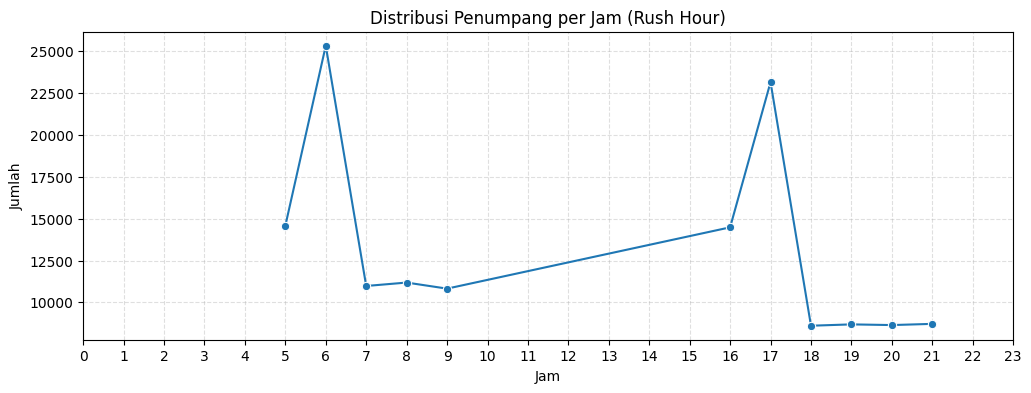

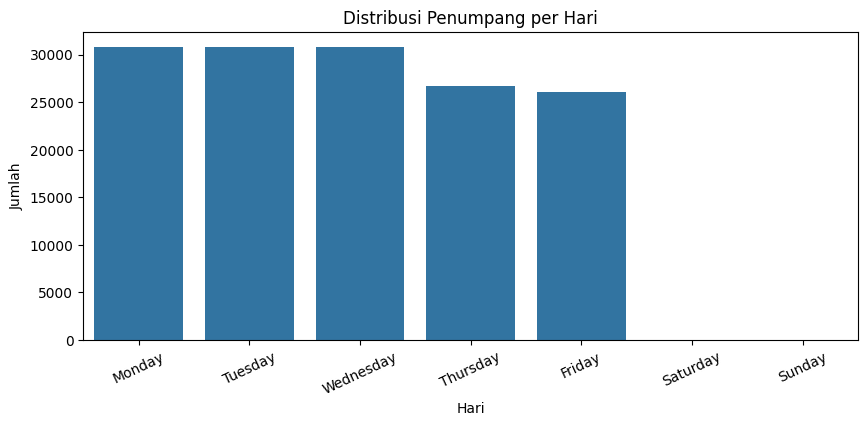

In [ ]:
# === CELL A2: visualisasi pola waktu ===
plt.figure(figsize=(12,4))
sns.lineplot(x=per_hour.index, y=per_hour.values, marker="o")
plt.title("Distribusi Penumpang per Jam (Rush Hour)"); plt.xlabel("Jam"); plt.ylabel("Jumlah")
plt.xticks(range(0,24)); plt.grid(True, ls="--", alpha=.4); plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x=per_dow.index, y=per_dow.values)
plt.title("Distribusi Penumpang per Hari"); plt.xlabel("Hari"); plt.ylabel("Jumlah")
plt.xticks(rotation=25); plt.show()


## Top Koridor & Halte

In [ ]:
# === CELL B1: top koridor & halte ===
top_corridor   = df["corridorID"].value_counts().head(10)
top_boarding   = df["boarding_stop"].value_counts().head(10)
top_alighting  = df["destination_stop"].value_counts().head(10)

display(top_corridor.to_frame("Jumlah Perjalanan"))
display(top_boarding.to_frame("Jumlah Naik"))
display(top_alighting.to_frame("Jumlah Turun"))


,Jumlah Perjalanan
corridorID,
11,1082
12H,1058
13,991
7,988
JAK.44,975
JAK.23,967
5,951
S31,941
11N,937


,Jumlah Naik
boarding_stop,
Penjaringan,1101
BNN LRT,632
BKN,610
Rusun Penjaringan,533
Garuda Taman Mini,529
BNN Arah Barat,462
Cibubur Junction,436
Duren Tiga,435
Rusun Kapuk Muara,419


,Jumlah Turun
destination_stop,
Penjaringan,1263
BKN,1061
Jelambar,605
Term. Senen,581
Rusun Penjaringan,516
St. MRT Fatmawati,513
Puri Beta 2,507
Cibubur Junction,490
BNN LRT,484


In [ ]:
# === CELL C1: ringkasan pembayaran & cek anomali tarif ===
card_usage = df["payCardBank"].value_counts()
zero_cnt   = (df["fare"]<=0).sum()
low_cnt    = (df["fare"]<3000).sum()
print({"rows":len(df), "fare==0": int(zero_cnt), "fare<3000": int(low_cnt)})

display(card_usage.to_frame("Jumlah Transaksi"))


{'rows': 145170, 'fare==0': 63962, 'fare<3000': 63962}


,Jumlah Transaksi
payCardBank,
DKI,72924
eMoney,23601
Brizzi,12785
BNI,12137
Flazz,11878
Online,11845


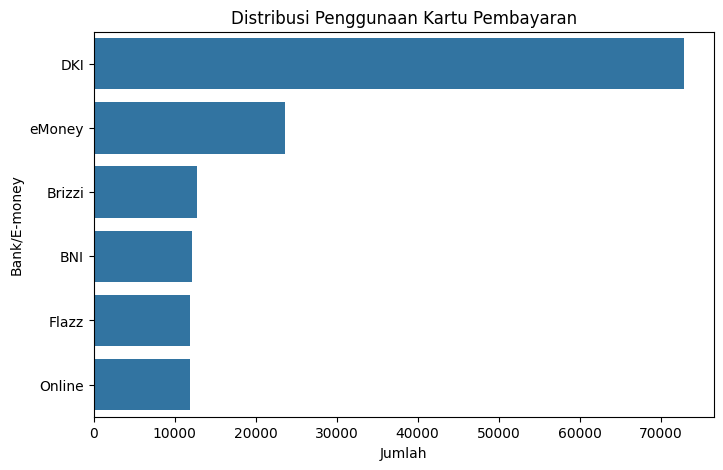

In [ ]:
# === CELL C2: visualisasi penggunaan kartu ===
plt.figure(figsize=(8,5))
sns.barplot(y=card_usage.index, x=card_usage.values)
plt.title("Distribusi Penggunaan Kartu Pembayaran"); plt.xlabel("Jumlah"); plt.ylabel("Bank/E-money")
plt.show()

,fare
count,142451.0
mean,2655.523654
median,3500.0
min,0.0
max,20000.0


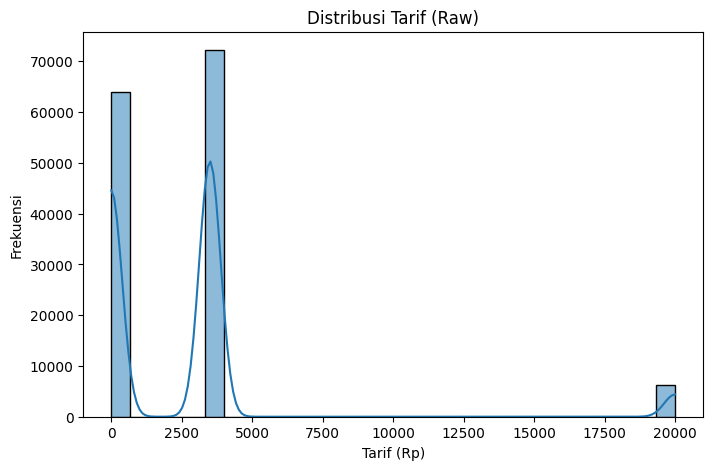

In [ ]:
# === CELL C3: distribusi tarif (raw) + statistik ===
fare_stats = df["fare"].describe()[["count","mean","50%","min","max"]]
fare_stats.index = ["count","mean","median","min","max"]
display(fare_stats)

plt.figure(figsize=(8,5))
sns.histplot(df["fare"], bins=30, kde=True)
plt.title("Distribusi Tarif (Raw)"); plt.xlabel("Tarif (Rp)"); plt.ylabel("Frekuensi")
plt.show()

,fare
count,72212.0
mean,3500.0
median,3500.0
min,3500.0
max,3500.0


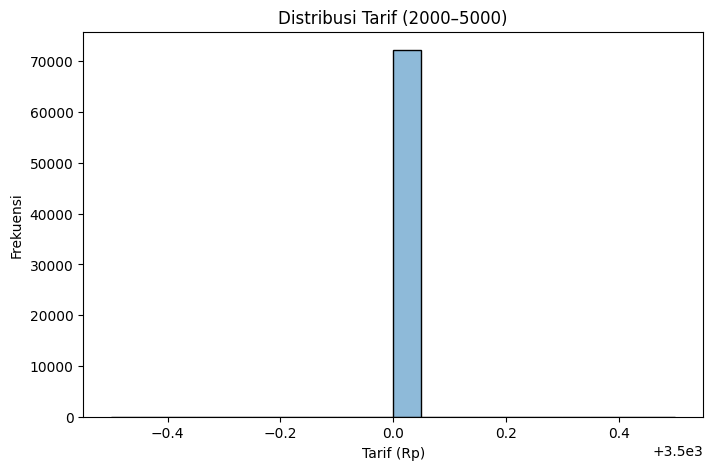

In [ ]:
# === CELL C4: versi 'bersih' (drop nol & outlier tinggi, keep 2000–5000) ===
df_fare_clean = df[df["fare"].between(2000, 5000)]
fare_stats_clean = df_fare_clean["fare"].describe()[["count","mean","50%","min","max"]]
fare_stats_clean.index = ["count","mean","median","min","max"]
display(fare_stats_clean)

plt.figure(figsize=(8,5))
sns.histplot(df_fare_clean["fare"], bins=20, kde=True)
plt.title("Distribusi Tarif (2000–5000)"); plt.xlabel("Tarif (Rp)"); plt.ylabel("Frekuensi")
plt.show()

In [ ]:
(df["fare"] == 3500).mean() * 100

np.float64(50.69251883103664)